In [1]:
import numpy as np
import dask
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import glob as glob
import time
from datetime import date
import io
import json
import os

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
!pwd


/gpfsdswork/projects/rech/egi/rote001/git/diags-CMEMS-on-jean-zay/Profiles-EN4


In [3]:
prof=11
jsonfile='/gpfsdswork/projects/rech/egi/rote001/git/diags-CMEMS-on-jean-zay/Profiles-EN4/MEDWEST60_y2010m01d01-y2010m09d30.json'
sourcefile=open(jsonfile,'rU',encoding='utf-8')
infos=json.load(sourcefile)
nb_profilesEN4=len(infos)
list_profiles=infos.keys()

reference =  str(list(list_profiles)[prof])
lat_prof = infos[reference]['latitude']
lon_prof = infos[reference]['longitude']

with open('prof0.txt','w') as txt_file:
    txt_file.write('Profile_'+str(reference[2:10])+' '+str(lon_prof)+' '+str(lat_prof))
    


/gpfslocalsup/pub/anaconda-py3/2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 'U' mode is deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
!source ~/.bashrc; /gpfswork/rech/egi/rote001/git/sosie/bin/ij_from_lon_lat.x -i /gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-I/MEDWEST60_mesh_hgr.nc4 -p prof0.txt >/dev/null



/linkhome/rech/genige01/rote001/.bashrc: line 1: module: command not found
/linkhome/rech/genige01/rote001/.bashrc: line 2: module: command not found
/linkhome/rech/genige01/rote001/.bashrc: line 3: module: command not found
/linkhome/rech/genige01/rote001/.bashrc: line 4: module: command not found
/linkhome/rech/genige01/rote001/.bashrc: line 5: module: command not found
/linkhome/rech/genige01/rote001/.bashrc: line 6: module: command not found
/gpfswork/rech/egi/rote001/git/sosie/bin/ij_from_lon_lat.x: error while loading shared libraries: libnetcdf.so.15: cannot open shared object file: No such file or directory


In [5]:
with open('ij_found.out','r') as txt_file:
    last_line = txt_file.readlines()[-1]
    i0=int(last_line.split()[1])
    j0=int(last_line.split()[2])

def check_prof_in_ocean(i0,j0):
    print('check if profile is in the ocean')
    dsN=xr.open_dataset('/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-I/MEDWEST60_mask.nc4')
    tmaskN=dsN.tmask
    if tmaskN[0,0,int(j0),int(i0)] == 1:
        check=0
    else:
        check=1
    return check

check=check_prof_in_ocean(i0,j0)
if check == 0:
    print('profile is in the ocean')
else:
    print('profile is on the land')
            

check if profile is in the ocean
profile is in the ocean


In [6]:
    date_prof = infos[reference]['date']
    file_prof = infos[reference]['file']
    prof_prof = infos[reference]['profile no']
    year=int(date_prof[0:4])
    month=int(date_prof[5:7])
    day=int(date_prof[8:10])
    date=datetime.date(int(date_prof[0:4]),int(date_prof[5:7]),int(date_prof[8:10]))
    print('profile date is '+str(date))
    date_avant=date-datetime.timedelta(days=10)
    date_apres=date+datetime.timedelta(days=10)
    def date_range(start, end):
        r = (end+datetime.timedelta(days=1)-start).days
        return [start+datetime.timedelta(days=i) for i in range(r)]
    dateList = date_range(date_avant, date_apres) # list of days between datemin and datemax


profile date is 2010-01-14


In [7]:
print(dateList)

[datetime.date(2010, 1, 4), datetime.date(2010, 1, 5), datetime.date(2010, 1, 6), datetime.date(2010, 1, 7), datetime.date(2010, 1, 8), datetime.date(2010, 1, 9), datetime.date(2010, 1, 10), datetime.date(2010, 1, 11), datetime.date(2010, 1, 12), datetime.date(2010, 1, 13), datetime.date(2010, 1, 14), datetime.date(2010, 1, 15), datetime.date(2010, 1, 16), datetime.date(2010, 1, 17), datetime.date(2010, 1, 18), datetime.date(2010, 1, 19), datetime.date(2010, 1, 20), datetime.date(2010, 1, 21), datetime.date(2010, 1, 22), datetime.date(2010, 1, 23), datetime.date(2010, 1, 24)]


In [8]:
def check_prof_date():
    print('check if profile is in the right period')
    check=0
    date_prof = infos[reference]['date']
    file_prof = infos[reference]['file']
    prof_prof = infos[reference]['profile no']
    year=int(date_prof[0:4])
    month=int(date_prof[5:7])
    day=int(date_prof[8:10])
    date=datetime.date(int(date_prof[0:4]),int(date_prof[5:7]),int(date_prof[8:10]))
    print('profile date is '+str(date))
    date_avant=date-datetime.timedelta(days=10)
    date_apres=date+datetime.timedelta(days=10)
    def date_range(start, end):
        r = (end+datetime.timedelta(days=1)-start).days
        return [start+datetime.timedelta(days=i) for i in range(r)]
    dateList = date_range(date_avant, date_apres) # list of days between datemin and datemax
    list_files=[]
    for date in dateList:
        mm="{:02d}".format(date.month) #month on 2 digits
        dd="{:02d}".format(date.day) # day on 2 digits
        file='/gpfsstore/rech/egi/commun/MEDWEST60/extracted_eNATL60/allv/MEDWEST60-BLBT02_y'+str(date.year)+'m'+str(mm)+'d'+str(dd)+'.1h_gridT.nc'
        if not os.path.exists(file):
            check=check+1
        else:
            list_files.append(file)
    return check,dateList   

check,dateList=check_prof_date()
if check == 0:
    print('profile is in the right period')
else:
    print('profile is too soon or too late')



check if profile is in the right period
profile date is 2010-01-14
profile is in the right period


In [9]:
print(list(dateList))

[datetime.date(2010, 1, 4), datetime.date(2010, 1, 5), datetime.date(2010, 1, 6), datetime.date(2010, 1, 7), datetime.date(2010, 1, 8), datetime.date(2010, 1, 9), datetime.date(2010, 1, 10), datetime.date(2010, 1, 11), datetime.date(2010, 1, 12), datetime.date(2010, 1, 13), datetime.date(2010, 1, 14), datetime.date(2010, 1, 15), datetime.date(2010, 1, 16), datetime.date(2010, 1, 17), datetime.date(2010, 1, 18), datetime.date(2010, 1, 19), datetime.date(2010, 1, 20), datetime.date(2010, 1, 21), datetime.date(2010, 1, 22), datetime.date(2010, 1, 23), datetime.date(2010, 1, 24)]


In [10]:
def check_prof_near_coast(i0,j0):
    print('check if profile is too close to continent, island or boundary')
    dsN=xr.open_dataset('/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-I/MEDWEST60_mask.nc4')
    tmaskN=dsN.tmask
    check=0
    for i in np.arange(15):
        for j in np.arange(15):
            if (np.array(tmaskN[0,0,int(j0)-j,int(i0)-i])+np.array(tmaskN[0,0,int(j0)-j,int(i0)+i])+np.array(tmaskN[0,0,int(j0)+j,int(i0)-i])+np.array(tmaskN[0,0,int(j0)+j,int(i0)+i])) < 4:
                check=check+1
                print('selected profile is too close to continent, the program is stopping')
    return check

check=check_prof_near_coast(i0,j0)
if check == 0:
    print('profile is not too close to continent, island or boundary')
else:
    print('profile is too close to continent, island or boundary')


check if profile is too close to continent, island or boundary
profile is not too close to continent, island or boundary


In [11]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.patches as mpatches

def map_profile_from_jsonfile(all_lat,all_lon):
    fig=plt.figure(figsize=(20,15))
    ax = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=0))
    ax.set_extent((lonmin, lonmax, latmin, latmax))
    ax.coastlines(resolution="10m")
    gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                      alpha=0.5)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    ax.tick_params('both',labelsize=22)
    ax.add_patch(mpatches.Circle(xy=[all_lon, all_lat], radius=0.25, color='green', alpha=0.3, transform=ccrs.PlateCarree(), zorder=30))

    plt.scatter(all_lon, all_lat, c='g', linewidth='0', s=18);


<xarray.DataArray 'nav_lat' ()>
array(34.84750366) <xarray.DataArray 'nav_lat' ()>
array(45.13545609) <xarray.DataArray 'nav_lon' ()>
array(-5.68308401) <xarray.DataArray 'nav_lon' ()>
array(9.59771824)


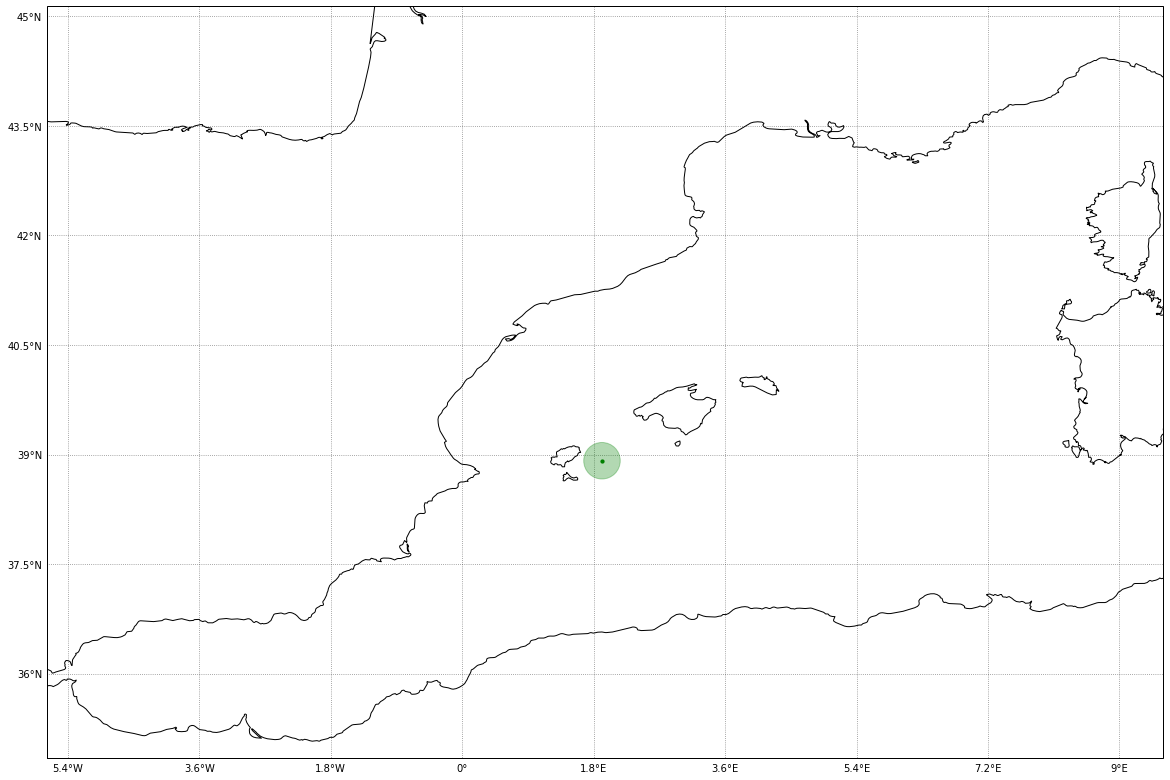

In [12]:
ds=xr.open_dataset('/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-I/MEDWEST60_coordinates_v3.nc4')
lat=ds.nav_lat
lon=ds.nav_lon
latmin,latmax,lonmin,lonmax=(lat.min(),lat.max(),lon.min(),lon.max())
print(latmin,latmax,lonmin,lonmax)
map_profile_from_jsonfile(lat_prof,lon_prof)

In [13]:
list_filesT=[]
list_filesS=[]
for date in dateList:
    mm="{:02d}".format(date.month) #month on 2 digits
    dd="{:02d}".format(date.day) # day on 2 digits
    fileT='/gpfsstore/rech/egi/commun/MEDWEST60/extracted_eNATL60/allv/MEDWEST60-BLBT02_y'+str(date.year)+'m'+str(mm)+'d'+str(dd)+'.1h_gridT.nc'
    fileS='/gpfsstore/rech/egi/commun/MEDWEST60/extracted_eNATL60/allv/MEDWEST60-BLBT02_y'+str(date.year)+'m'+str(mm)+'d'+str(dd)+'.1h_gridS.nc'
    if os.path.exists(fileT):
        list_filesT.append(fileT)
    if os.path.exists(fileS):
        list_filesS.append(fileS)
dsT=xr.open_mfdataset(list_filesT,combine='nested', concat_dim='time_counter')
dsS=xr.open_mfdataset(list_filesS,combine='nested', concat_dim='time_counter')
temp_mod=dsT.votemper[:,:,j0-10:j0+10,i0-10:i0+10]
salt_mod=dsS.vosaline[:,:,j0-10:j0+10,i0-10:i0+10]
ds=xr.open_dataset('/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-I/MEDWEST60_coordinates_v3.nc4')
lat_mod=ds.nav_lat[j0-10:j0+10,i0-10:i0+10]
lon_mod=ds.nav_lon[j0-10:j0+10,i0-10:i0+10]


In [14]:
ds=xr.open_dataset('/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-I/MEDWEST60_coordinates_v3.nc4')
ds

<xarray.Dataset>
Dimensions:  (x: 883, y: 803)
Dimensions without coordinates: x, y
Data variables:
    e1f      (y, x) float64 ...
    e1t      (y, x) float64 ...
    e1u      (y, x) float64 ...
    e1v      (y, x) float64 ...
    e2f      (y, x) float64 ...
    e2t      (y, x) float64 ...
    e2u      (y, x) float64 ...
    e2v      (y, x) float64 ...
    glamf    (y, x) float64 ...
    glamt    (y, x) float64 ...
    glamu    (y, x) float64 ...
    glamv    (y, x) float64 ...
    gphif    (y, x) float64 ...
    gphit    (y, x) float64 ...
    gphiu    (y, x) float64 ...
    gphiv    (y, x) float64 ...
    nav_lat  (y, x) float32 ...
    nav_lon  (y, x) float32 ...
Attributes:
    history:  Tue Jun  4 16:55:50 2019: ncks -4 -L 1 -d x,5529,6411 -d y,1869...
    NCO:      4.4.6

In [16]:
lon_stacked = lon_mod.stack(profile=('x', 'y'))
lat_stacked = lat_mod.stack(profile=('x', 'y'))

distance_threshold = 0.4
square_distance_to_observation = (lon_stacked - lon_prof)**2 + (lat_stacked - lat_prof)**2
is_close_to_observation = square_distance_to_observation < distance_threshold**2

model_temperature_stacked = temp_mod.stack(profile=('x', 'y'))
model_salinity_stacked = salt_mod.stack(profile=('x', 'y'))

model_temperature_near_observation = model_temperature_stacked.where(is_close_to_observation,drop=True)
model_salinity_near_observation = model_salinity_stacked.where(is_close_to_observation, drop=True)
lat_near_observation = lat_stacked.where(is_close_to_observation, drop=True)
lon_near_observation = lon_stacked.where(is_close_to_observation, drop=True)


In [17]:
np.max(square_distance_to_observation)

<xarray.DataArray ()>
array(0.04798464)

In [ ]:
def check_prof_prof(i0,j0):
    print('check if profile has a good depth')
    dsN=xr.open_dataset('/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-I/MEDWEST60_mask.nc4')
    tmaskN=dsN.tmask
    prof_mod=tmaskN[0,:,int(j0),int(i0)]
    
    if tmaskN[0,0,int(j0),int(i0)] == 1:
        check=0
    else:
        check=1
    return check

check=check_prof_in_ocean(i0,j0)
if check == 0:
    print('profile is in the ocean')
else:
    print('profile is on the land')
            

In [25]:
    print('check if profile has a good depth')
    dsN=xr.open_dataset('/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-I/MEDWEST60_mask.nc4')
    tmaskN=dsN.tmask
    prof_mod=tmaskN[0,:,int(j0),int(i0)]
    dsH=xr.open_dataset('/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-I/MEDWEST60_mesh_zgr.nc4')
    depthN=dsH.gdept_1d[0]


check if profile has a good depth


In [21]:
indz=np.where(prof_mod.values<1)

In [26]:
print(depthN[np.min(indz)])

<xarray.DataArray 'gdept_1d' ()>
array(332.538341)


In [28]:
    diren4="/gpfswork/rech/egi/rote001/EN4/"
    file_prof = infos[reference]['file']
    tfileEN4=diren4+file_prof



In [30]:
    dsen4=xr.open_dataset(tfileEN4)


In [32]:
ref_prof = infos[list(list_profiles)[prof]]['profile no']

In [34]:
    tempen4=dsen4['TEMP_ADJUSTED'][ref_prof]
    salten4=dsen4['PSAL_ADJUSTED'][ref_prof]
    presen4=dsen4['PRES_ADJUSTED'][ref_prof]


In [36]:
presen4

<xarray.DataArray 'PRES_ADJUSTED' (N_LEVELS: 967)>
array([15., 26., 36., ..., nan, nan, nan], dtype=float32)
Dimensions without coordinates: N_LEVELS
Attributes:
    long_name:       Sea water pressure, equals 0 at sea-level
    standard_name:   sea_water_pressure
    units:           decibar
    valid_min:       0.0
    valid_max:       12000.0
    C_format:        %7.1f
    FORTRAN_format:  F7.1
    resolution:      1.0
    axis:            Z

In [37]:
import seawater

ModuleNotFoundError: No module named 'seawater'

In [ ]:
seawater.eos80.dpth(p, lat)
Calculates depth in meters from pressure in dbars.

Parameters:	
p : array_like

pressure [db].

lat : number or array_like

latitude in decimal degrees north [-90..+90].

Returns:	
z : array_like

depth [meters]

In [ ]:

    observation_dep=depen4
    observation_temp=tempen4
    observation_salt=salten4

    depN = dsN.deptht
    tempN=dsN.votemper
    saltN=dsN.vosaline

    #get the number of useful levels in EN4 profile
    dep_level=np.zeros(1)

    for k in np.arange(len(observation_dep)):
        if not np.isnan(observation_dep[k]):
            dep_level[0]=k

    #get the corresponding model level
    model_level=np.zeros(int(dep_level[0]))
    model_dep=np.zeros(int(dep_level[0]))
    obsred_dep=np.zeros(int(dep_level[0]))
    obsred_temp=np.zeros(int(dep_level[0]))
    obsred_salt=np.zeros(int(dep_level[0]))
    for z in np.arange(int(dep_level[0])):
        obsred_dep[int(z)]=observation_dep[int(z)]
        obsred_temp[int(z)]=observation_temp[int(z)]
        obsred_salt[int(z)]=observation_salt[int(z)]
        diff_dep=0*depN.values
        for k in np.arange(len(depN.values)):
            diff_dep[k]=depN.values[k]-obsred_dep[int(z)]
        lev=np.where(np.abs(diff_dep)==np.min(np.abs(diff_dep)))
        model_level[z]=lev[0]
        model_dep[z]=depN.values[lev[0]]
